## Project #1 - Data pre-processing

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

This project delves into feature engineering, an important step in machine learning (ML). It highlights the importance of data pre-processing, which includes, data cleaning, feature selection and data smoothing. The project presents a structure workflow that goes through each phase using various Python libraries to handle, visualize and refine data. The outcome is a cleaned dataset, optimized for upcoming ML modeling. 

## Introduction

Feature engineering is one of the most important cornerstones of machine learning models. In this project, we highlight the importance of preparing data through pre-processing to enhance the performance of ML models. The project is structured into three main phases: data cleaning, feature selecting and data smoothing. We use various Python libraries to incorporate these processes, ensuring a structured way to handle, analyze and refine data. 

## Tasks

### Data pre-processing

In [41]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
LogData = pd.read_excel('LogDataProject.xlsx')

In [42]:
# Explore the dataset
LogData.info()
LogData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vs      1136 non-null   object
 1   DEN     1136 non-null   object
 2   NEU     1136 non-null   object
 3   Vp      1134 non-null   object
dtypes: object(4)
memory usage: 35.8+ KB


,Vs,DEN,NEU,Vp
0,1.676857,2.3767,0.2759,3.045533
1,1.677172,2.2101,0.2524,2.974779
2,1.676252,2.1419,0.2591,2.881411
3,1.67703,2.166,0.2589,2.930981
4,1.684534,2.1193,0.2596,2.910094


**Comment:** From the output, we can observe that the data is not clean. The *RageIndex* indicates that it is 1140 total entries. But the *Non-Null Count* column shows that *Vs* contains 1136 non-null entries. This shows that there are 4 entries in the *Vs* column that are missing or are null-values. This means we have to pre-process the data.

In [43]:
# Convert each column to numeric values wherever possible and NaN (Not a Number) for any non-numeric values
LogData['Vs'] = pd.to_numeric(LogData['Vs'], errors='coerce')
LogData['DEN'] = pd.to_numeric(LogData['DEN'], errors='coerce')
LogData['NEU'] = pd.to_numeric(LogData['NEU'], errors='coerce')
LogData['Vp'] = pd.to_numeric(LogData['Vp'], errors='coerce')

print(LogData.dtypes)
LogData.info()

Vs     float64
DEN    float64
NEU    float64
Vp     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1135 non-null   float64
 1   DEN     1134 non-null   float64
 2   NEU     1133 non-null   float64
 3   Vp      1131 non-null   float64
dtypes: float64(4)
memory usage: 35.8 KB


**Comment:** After converting each column to numeric values wherever possible, we can see that the types of all columns are now float64 with printing out the *LogData.dtypes*. There are still null values in our data, but these are now represented with *NaN*'s, so it will be easy to remove these later.

In [44]:
# Remove NaN values
LogData.dropna(inplace=True)

LogData.info()
LogData.describe()

# Check if there are any blanks/null values
print(LogData.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 1139
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1124 non-null   float64
 1   DEN     1124 non-null   float64
 2   NEU     1124 non-null   float64
 3   Vp      1124 non-null   float64
dtypes: float64(4)
memory usage: 43.9 KB
Vs     0
DEN    0
NEU    0
Vp     0
dtype: int64


**Comment:** Now we have removed every NaN value. By looking at the *info* from our dataset, we can see that we have removed 20 rows, since the total number of rows are now 1120.

In [45]:
# Locate any duplicate values
duplicates = LogData.duplicated()

# Will print True if there are any duplicates
print(duplicates.any())

# Will print the duplicate values
print(LogData[duplicates])

True
            Vs     DEN     NEU        Vp
1106  1.056314  2.3807  0.3371  2.588172
1107  1.053382  2.3766  0.3452  2.619560
1108  1.066399  2.3660  0.3426  2.626140
1109  1.064992  2.3538  0.3670  2.613025
1110  1.046916  2.3505  0.3509  2.597221
1111  1.033467  2.3533  0.3523  2.581377
1112  1.046970  2.3535  0.3317  2.590031
1113  1.029629  2.3574  0.3455  2.630902
1124  1.072748  2.3358  0.3216  2.584707
1129  1.211407  2.3670  0.3000  2.766731
1132  1.106032  2.3645  0.3233  2.633402
1133  1.072748  2.3358  0.3216  2.584707
1134  1.066803  2.3268  0.3452  2.571996
1135  1.066234  2.3441  0.3472  2.575603
1136  1.056314  2.3807  0.3371  2.588172
1137  1.053382  2.3766  0.3452  2.619560
1138  1.066399  2.3660  0.3426  2.626140
1139  1.064992  2.3538  0.3670  2.613025


**Comment:** By checking if there are any duplicates we can see that there are duplicate values in our data.

In [46]:
# Print out the shape of the dataset before deleting duplicate values
print("Shape before deleting duplicate values", LogData.shape)

# Remove duplicate values
LogData = LogData.drop_duplicates()

# Print out the shape of the dataset after deleting duplicate values
print("Shape after deleting duplicate values", LogData.shape)

Shape before deleting duplicate values (1124, 4)
Shape after deleting duplicate values (1106, 4)


**Comment:** From the *shape* method we can see that we removed 18 rows of duplicated values. 

In [47]:
LogData.info()
LogData.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1106 non-null   float64
 1   DEN     1106 non-null   float64
 2   NEU     1106 non-null   float64
 3   Vp      1106 non-null   float64
dtypes: float64(4)
memory usage: 43.2 KB


,Vs,DEN,NEU,Vp
0,1.676857,2.3767,0.2759,3.045533
1,1.677172,2.2101,0.2524,2.974779
2,1.676252,2.1419,0.2591,2.881411
3,1.677030,2.1660,0.2589,2.930981
4,1.684534,2.1193,0.2596,2.910094


**Comment:** Now we have converted all types to float64, removed all blanks/null values and removed all duplicate values. 

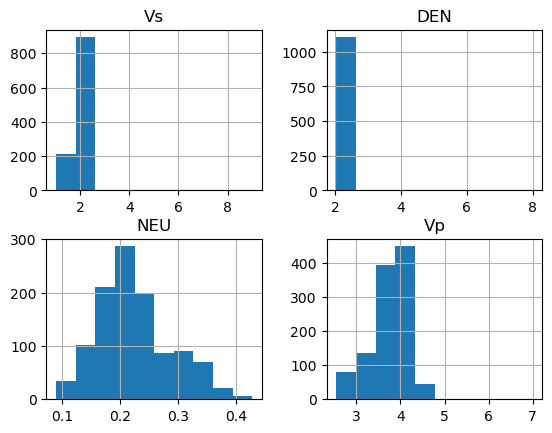

In [48]:
# Histogram of the dataset
LogData.hist(['Vs', 'DEN', 'NEU', 'Vp'])

# Save the cleaned dataset to a new file
LogData.to_excel('LogDataProject_Cleaned.xlsx', index=False)

**Comment:** From the histogram, we can see that since the x-axis for *Vs*, *DEN* and *Vp* is spread out, past the normal values. This is due to outlier values in the data.

<Axes: >

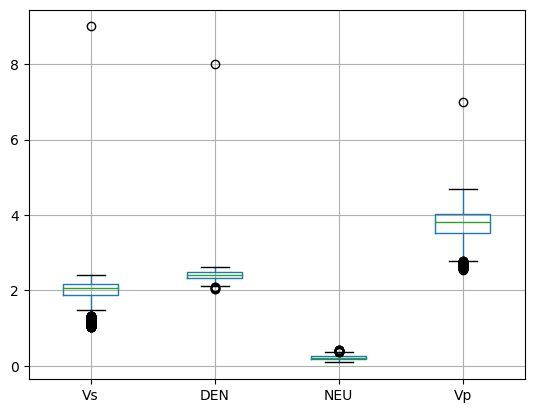

In [49]:
# Check if outliers exist
LogData.boxplot(['Vs', 'DEN', 'NEU', 'Vp'])

**Comment:** From the boxplot, we can see that *Vs*, *DEN* and *Vp* have outlier values. These are represented by the circles outside the boxes. These are located more than 1.5 * IQR from the quartiles.  

<Axes: >

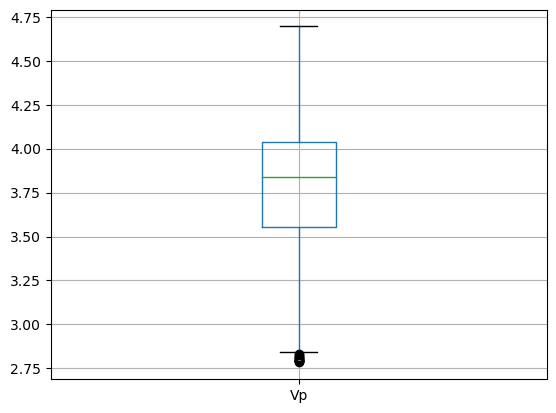

In [50]:
# Outliers removal

# Import cleaned dataset
LogDataCleaned = pd.read_excel('LogDataProject_Cleaned.xlsx')

# Calculate upper/lower limits for each column
Q1, Q3 = np.percentile(LogDataCleaned['Vp'], [25, 75])

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower limits
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

# Remove outliers
LogDataCleaned = LogDataCleaned[(LogDataCleaned['Vp'] > lower) & (LogDataCleaned['Vp'] < upper)]

# Check the shape of the dataset after removing outliers
LogDataCleaned.shape

# Check if the outliers from the target is removed
LogDataCleaned.boxplot(['Vp'])


**Comment:** After removing the outlier values, we can see that we have 1059 rows in our dataset now. We can also see there are no outliers in the boxplot for our target value *Vp*.

In [51]:
# Save the cleaned dataset without outliers to a new file
LogDataCleaned.to_excel('LogDataProject_Cleaned_OutliersRemoved.xlsx', index=False)

### Feature selection

<Axes: >

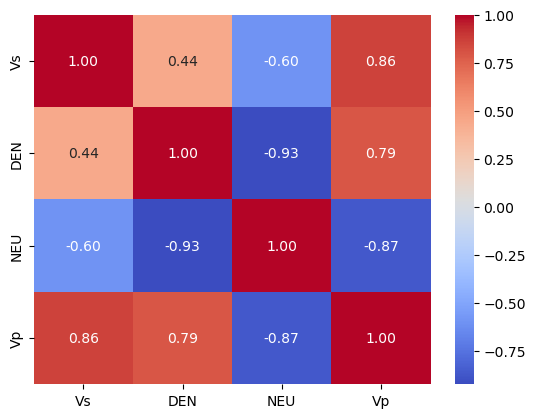

In [52]:
# Import cleaned dataset without outliers
LogDataCleanedNoOutliers = pd.read_excel('LogDataProject_Cleaned_OutliersRemoved.xlsx')

# Construct heatmap to check for correlation between features
sns.heatmap(LogDataCleanedNoOutliers.corr(), annot=True, fmt='.2f', cmap='coolwarm')

**Comment:** From the heatmap we can see that the diagonal is 1. This is expected since these entries represent the correlation of each variable with itself. There is also a strong correlation with *Vs* and *Vp* (0.86). This means that as *Vs* increases, *Vp* tends to increase as well. There is a negative correlation between *NEU* and *DEN*. This implies that as *NEU* increases, *DEN* tends to decrease [1]. 

In [53]:
# Create correlation matrix
corr_matrix = LogDataCleanedNoOutliers.corr()
corr_matrix

,Vs,DEN,NEU,Vp
Vs,1.000000,0.443299,-0.601185,0.858799
DEN,0.443299,1.000000,-0.925204,0.794519
NEU,-0.601185,-0.925204,1.000000,-0.872007
Vp,0.858799,0.794519,-0.872007,1.000000


In [54]:
# Select correlation matrix that is related with the target
corr_matrix['Vp'][abs(corr_matrix['Vp']) > 0.5]

Vs     0.858799
DEN    0.794519
NEU   -0.872007
Vp     1.000000
Name: Vp, dtype: float64

**Comment:** When we select the variables from the correlation matrix that have an absolute correlation greater than 0.5 with *Vp*, we can see that all the variables are correlated with our target value *Vp*.

### Moving average smoothing

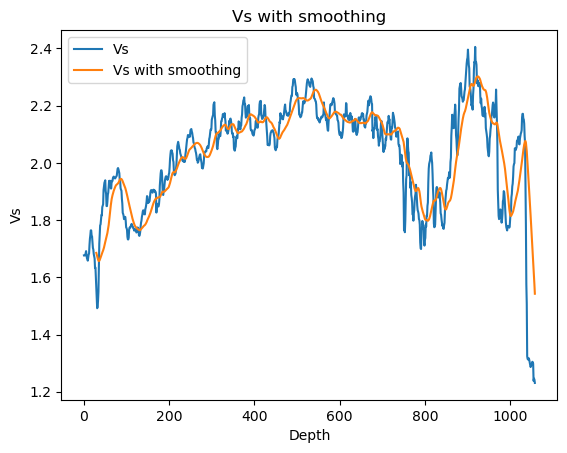

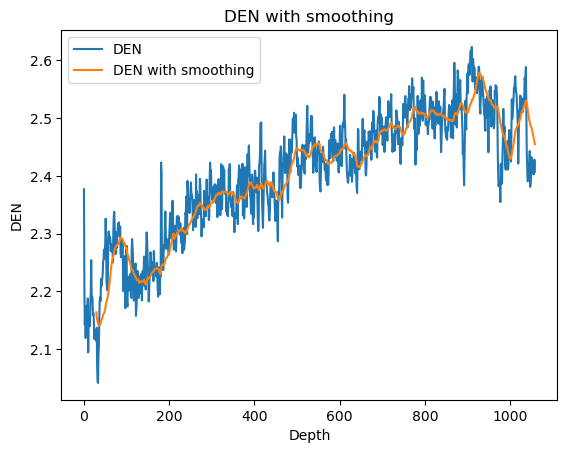

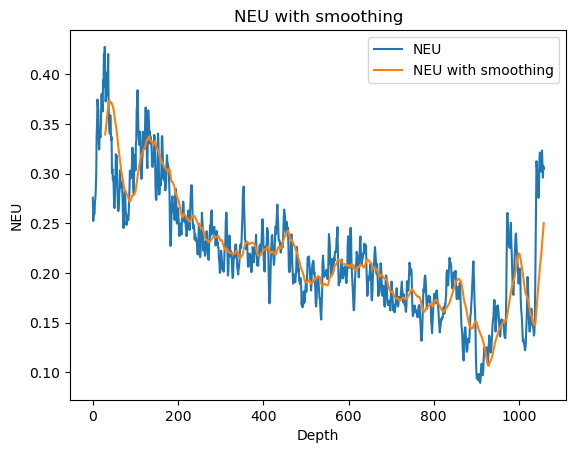

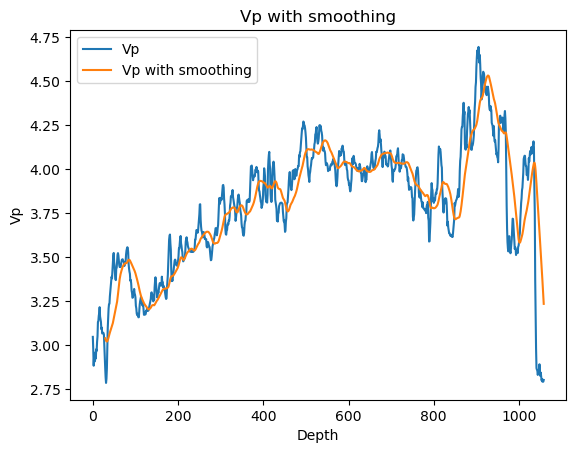

In [59]:
# Plot Vs with smoothing
plt.plot(LogDataCleanedNoOutliers['Vs'])
LogDataCleanedNoOutliers['Vs'].rolling(window=30).mean().plot()
plt.title('Vs with smoothing')
plt.legend(['Vs', 'Vs with smoothing'])
plt.xlabel('Depth')
plt.ylabel('Vs')
plt.show()

# Plot DEN with smoothing
plt.plot(LogDataCleanedNoOutliers['DEN'])
LogDataCleanedNoOutliers['DEN'].rolling(window=30).mean().plot()
plt.title('DEN with smoothing')
plt.legend(['DEN', 'DEN with smoothing'])
plt.xlabel('Depth')
plt.ylabel('DEN')
plt.show()

# Plot NEU with smoothing
plt.plot(LogDataCleanedNoOutliers['NEU'])
LogDataCleanedNoOutliers['NEU'].rolling(window=30).mean().plot()
plt.title('NEU with smoothing')
plt.legend(['NEU', 'NEU with smoothing'])
plt.xlabel('Depth')
plt.ylabel('NEU')
plt.show()

# Plot Vp with smoothing
plt.plot(LogDataCleanedNoOutliers['Vp'])
LogDataCleanedNoOutliers['Vp'].rolling(window=30).mean().plot()
plt.title('Vp with smoothing')
plt.legend(['Vp', 'Vp with smoothing'])
plt.xlabel('Depth')
plt.ylabel('Vp')
plt.show()

**Comment:** The smoothing applied to the plots serves to reduce the noise in the data. This provides a clearer view of the underlying trends that may be influenced by short-term fluctuations. The smoothed lines - calculated using a rolling mean - reveal more gradual trends. 

## Discussion and conclusion

In conclusion, this project successfully demonstrates the importance of feature engineering in the context of ML modeling. The process ensures that the dataset is not only free from inconsistencies, but also optimized for effective ML application. The final output, a clean, refined dataset is important asset, when continuing to with our projects, and to use further in ML modeling.

## Reflections

We are happy with the results of our project. It was a straightforward way to go from an uncleaned and unusable dataset, with several blank values, and other non-numeric values. This dataset was useless in the context of ML modeling, which we will delve deeper into in our next project. Therefore, it was an important step to feature engineer our dataset, into a cleaned dataset so we can use it later. The Python libraries, made it simple and effective to do this. 

## References

[1]: Wagavkar, S. (2023, March 17). Introduction to the Correlation Matrix. Built In. Retrieved from https://builtin.com/data-science/correlation-matrix